# Introduction

The world is urbanizing more and more every year. In fact, the United Nations predicts 70% of the world’s population will live in cities by 2050 (source). This is a marvelous feat for humanity as we continue to lift people out of extreme poverty all across the world. However, urbanization is not without its costs and at the top of the list of new problems we as society have to solve is the increased demand for energy. 

At this time, electricity is mainly created using fossil fuels. Though there are other environmentally friendly methods of energy production, at this time electricity cannot itself be stored on any scale. There are some storage system methods available, however they are nowhere close capacity-wise to fuel a city. 

As time goes on, innovation will give us more flexibility with solving the energy crisis urbanization will surely bring. But until then there is plenty of room to optimize energy production with the current methods we have at this time. In this analysis, I will be investigating hourly energy data in Spain (01/01/2015 - 12/31/2018) to do just that. 

The data contains hourly information about the generation, price, and demand of energy in Spain. Additionally, this data contains predictions for energy demand and prices made by Spain’s transmission system operator (TSO). 


## Intent

In this analysis, I will showcase a few models that outperforms the predictions the TSO made for hourly demand and the price of energy production. Once we have a better method to forecast energy demand and costs, we can help energy providers devise new energy production strategies that meet the needs of their consumers, lowers excess energy production thus saving cost and also explore ways to better integrate alternative green energy production methods. I will also look into consumer patterns of behaviors which can be used to help devise rebate programs to help reduce demand during forecasted peak times during the year.  

## Objectives

In this analysis, I will be conducting the following:

Model different consumer behaviors to create consumer profiles based on electricity demand using a clustering algorithm. I will extract times during the day they use power the most & least and try to draw additional insights about their behavior. Better understanding our consumers will allow us to devise rebate programs to incentivize consumers to limit power usage during specific times of the day/year when we forecast demand to be very high(helping energy production companies lower cost).

Creating a multivariate energy cost and demand predictors that will both surpasses previous TSO predictions in performance. Models will be able to make forecasts 3 months into the future. More specifically, models built were VAR, XGBRegressor, and a Deep Learning Network. Being able to forecast demand and cost will allow energy providers to devise production strategies that will limit costs, produce an optimal amount of energy and also leverage more green methods of production 


## Impact

The big picture impact of the analysis is to better develop ways to create cost efficient ways of energy production while also looking to incorporate green technology. By creating the right amount of energy, we protect the enviroment from harmful CO2 emissions as well as the bottomline of energy prodcution companies. If Spain is able to optimally produce electricity through the information we gained through the analysis, it stands to reason other nations can do the same. Thereby we can slowly work towards solving the energy crisis urbanization will certainly bring in the coming decades.

# Table of Contents

1. Introduction
     - Intent
     - Objectives
     - Impact
2. Table of Contents
3. Data Overview
    - About the Data
    - Preview Data
    - Data Overview - Metrics
4. Methodology
5. Consumer Profile Analysis
    - Results
6. Time Series Analysis
    - Results
7. Conclusion
    - Final Takeaways
    - Thoughts for future research

# Data Overview

## About the Data

Energy data contains hourly information about the generation of energy in Spain. In particular, there is info (in MW) about the amount of electricity generated by the various energy sources (fossil gas, fossil hard coal and wind energy dominate the energy grid), as well as about the total load (energy demand) of the national grid and the price of energy (€/MWh). Note: Since the generation of each energy type is in MW and the time-series contains hourly info, the number of each cell represent MWh.

Data source can be found [here](https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather).

## Preview Data

Below is a preview of the processed data. Data shape is 35,070 rows by 22 columns

In [25]:
#Read in some libraries
import pandas as pd
import numpy as np
from IPython.display import Image

#Set notebook preferences - pandas
pd.set_option("display.max_columns", 101)

#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in data
data = pd.read_csv(path + '/2020_0620_Weather_Energy.csv')

## Data Overview - Metrics

**Data Description**

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
forecast_solar_day_ahead,35070.0,1438.825121,1677.661532,0.000000,69.000,576.0000,2635.000,5836.0000
forecast_wind_onshore_day_ahead,35070.0,5471.372512,3176.148983,237.000000,2979.000,4855.5000,7353.000,17430.0000
generation_biomass,35070.0,383.536128,85.348006,0.000000,333.000,367.0000,433.000,592.0000
generation_fossil_brown_coal/lignite,35070.0,448.060251,354.603125,0.000000,0.000,509.0000,757.000,999.0000
generation_fossil_gas,35070.0,5622.474309,2201.444741,0.000000,4126.000,4969.0000,6428.750,20034.0000
generation_fossil_hard_coal,35070.0,4256.296179,1961.968024,0.000000,2527.000,4474.0000,5839.000,8359.0000
generation_fossil_oil,35070.0,298.335358,52.518153,0.000000,263.000,300.0000,330.000,449.0000
generation_hydro_pumped_storage_consumption,35070.0,475.867237,792.594472,0.000000,0.000,68.0000,617.000,4523.0000
generation_hydro_run-of-river_and_poundage,35070.0,972.117536,400.740520,0.000000,637.000,906.0000,1250.000,2000.0000
generation_hydro_water_reservoir,35070.0,2605.122241,1835.141359,0.000000,1077.250,2165.0000,3757.000,9728.0000


# Methodology

## Model  Consumer Behavior

I will be using a clustering algorithm to model different patterns of consumer behavior when it comes to hourly energy demand. I will be using the following steps

1.
2.
3.
4.

## Time-Series Analysis

### Building an Improved Cost Model

I will be conducting a mulitvariate time series analysis to better predict and forecast energy productions costs than the TSO predictions. I will be using the following steps:
1. Use the Granger's Test of Causality to confirm there is some kind of a relationship between the features of the dataset. If there are features without a relationship with the other features, they will be removed
2. Use the cointegration test to verify the presence of a statistically significant connection between each of the time series.
3. Make data stationary and extract additional features
4. Develop and deploy models with the aim to outperform OTO forecasts over a 3-month period

### Building an Improved Demand Model

I will be creating a univariate deep learning(LSTM) model to better predict consumer demand. The model will be univariate because there are no other meanigful features we can use to predict consumer behavior other than past behavior using lagged steps in the time series. Methods are as follows:
1. Prepare data by removing trend and seasonal components
2. 

# Consumer Profile Analysis

## Results

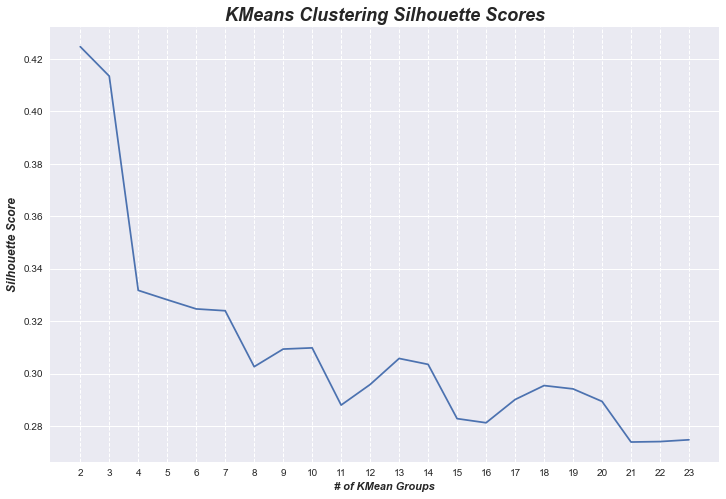

In [27]:
#Set path to model visuals
model_viz = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\03_Modeling'

#Read in Silhouette_Scores
Image(filename= model_viz + '/Silhouette_Scores.png', height=500, width=800)

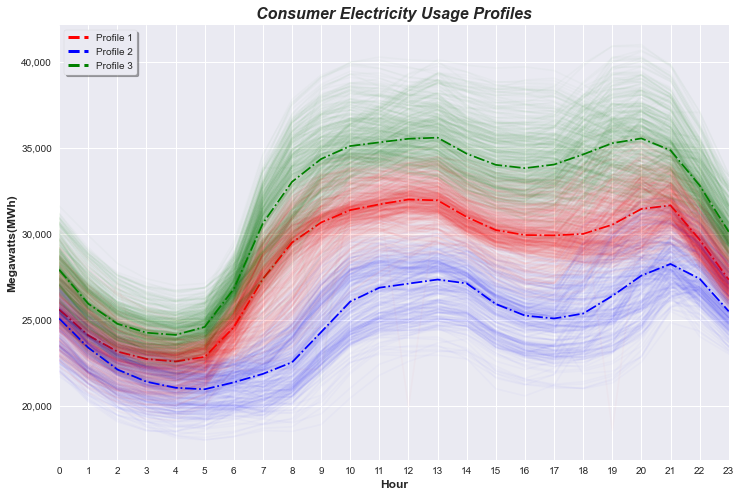

In [28]:
#Read in Silhouette_Scores
Image(filename= model_viz + '/Consumer_Energy_Profiles.png', height=500, width=1000)

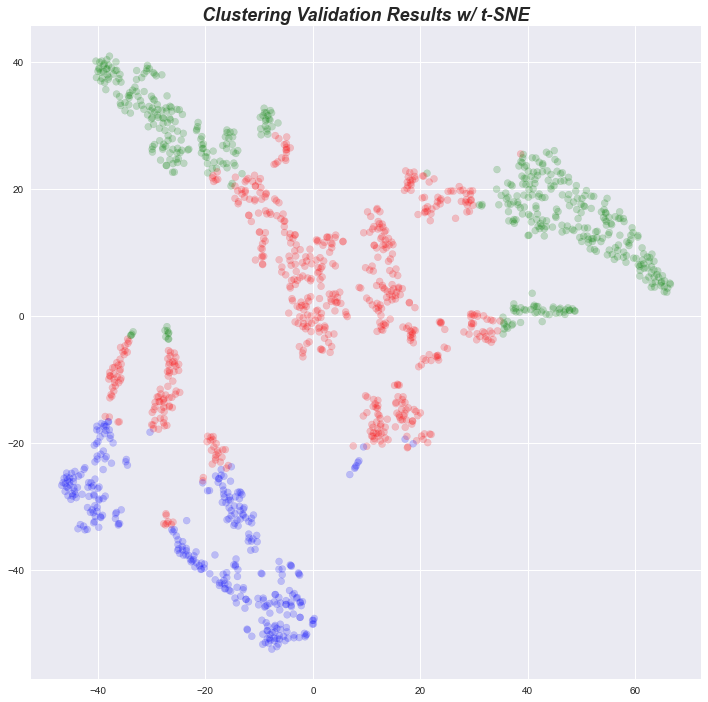

In [29]:
#Read in Silhouette_Scores
Image(filename= model_viz + '/t-SNE_results.png', height=700, width=700)

# Time Series Analysis

## Predicting Cost of Energy Production

TSO Predictions

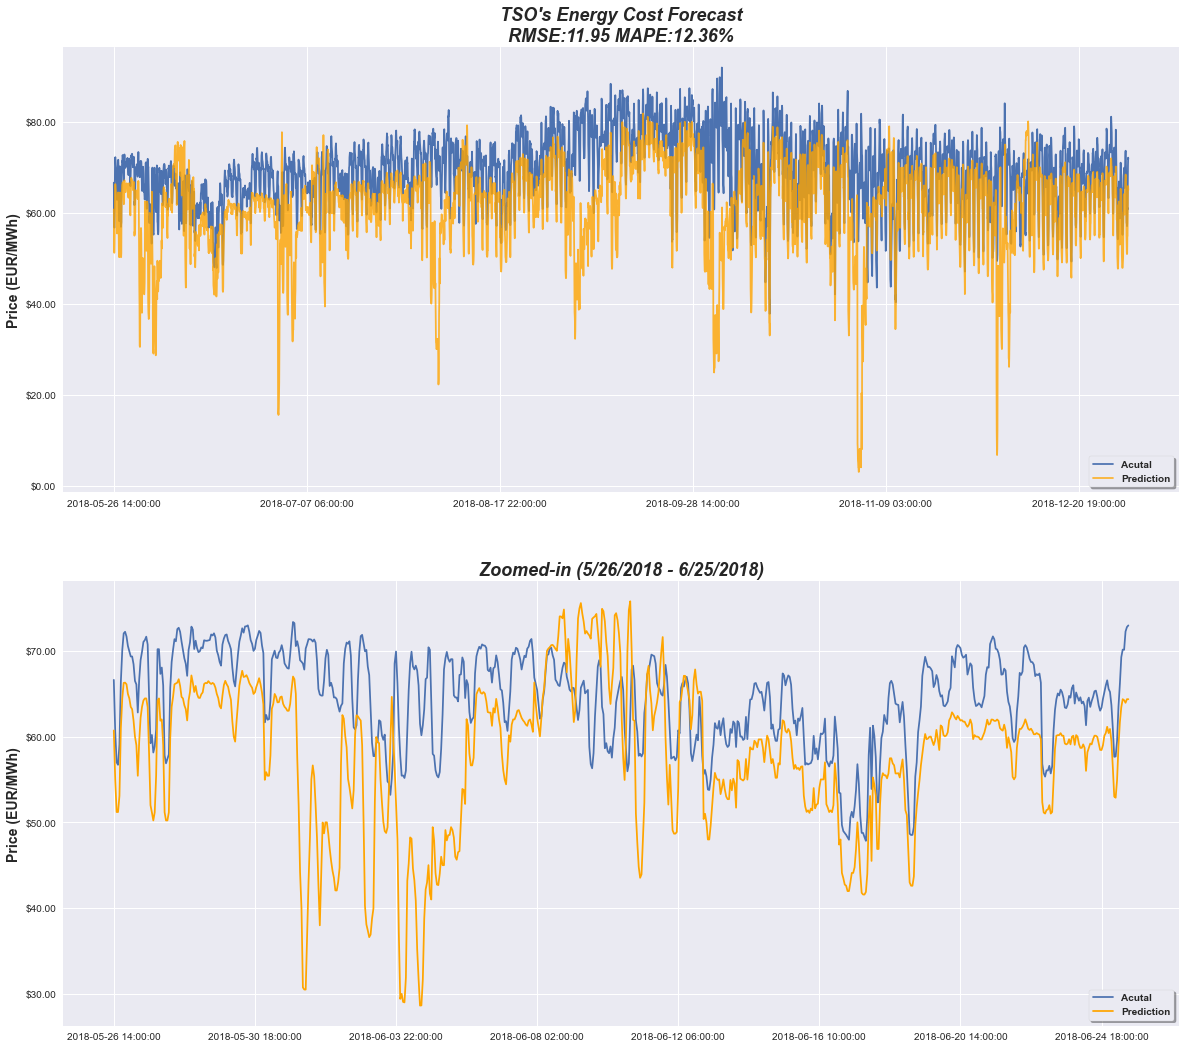

In [30]:
#Read in TSO_Cost_Predictions model
Image(filename= model_viz + '/TSO_Cost_Predictions.png', height=700, width=1400)

XGBRegressor

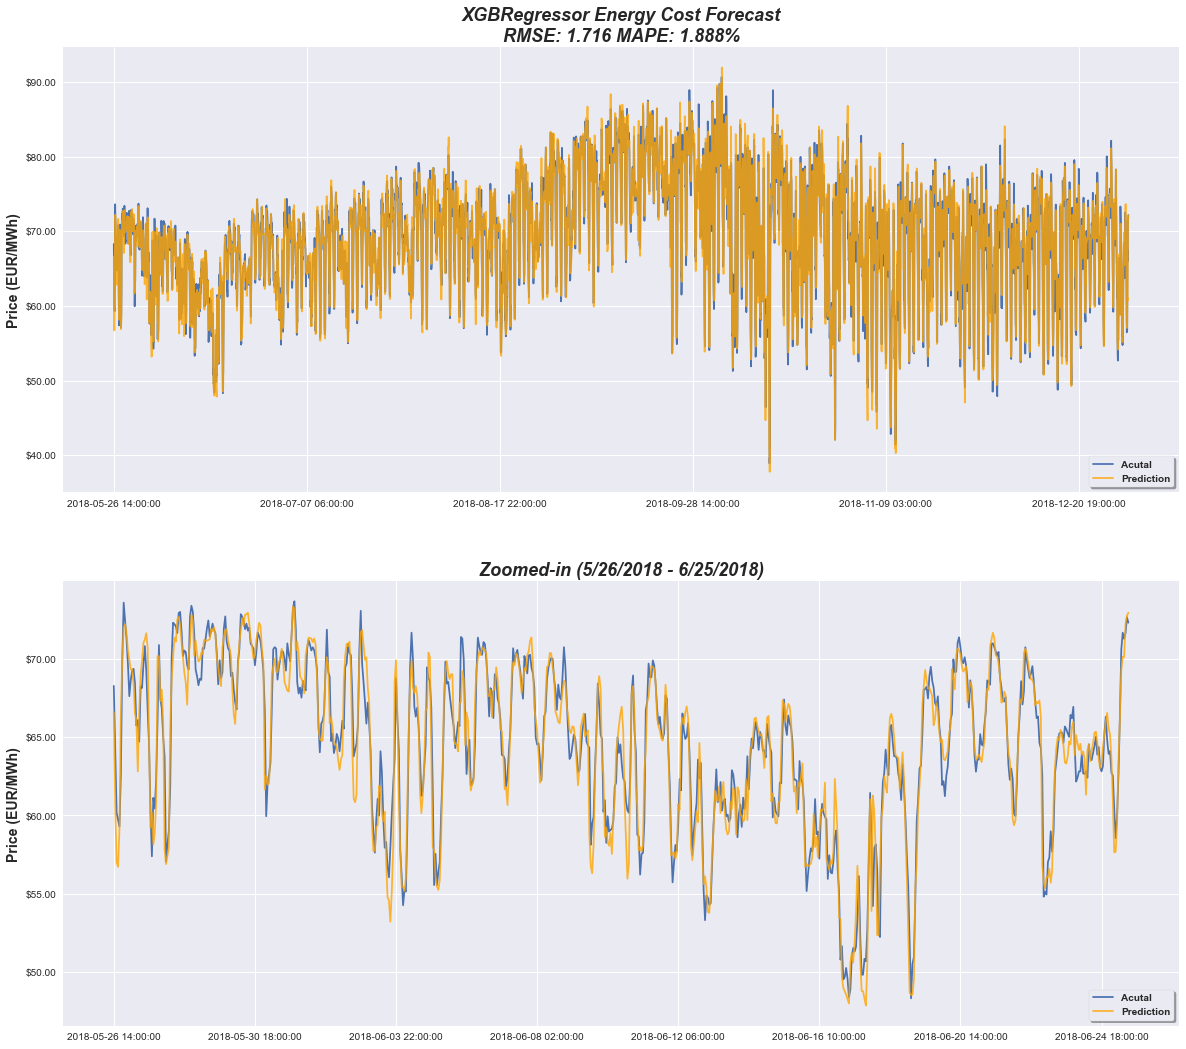

In [31]:
#Read in XGBR_Cost_Predictions model
Image(filename= model_viz + '/XGBR_Cost_Predictions.png', height=700, width=1400)

## Predicting Energy Demand

Base Model Predictions

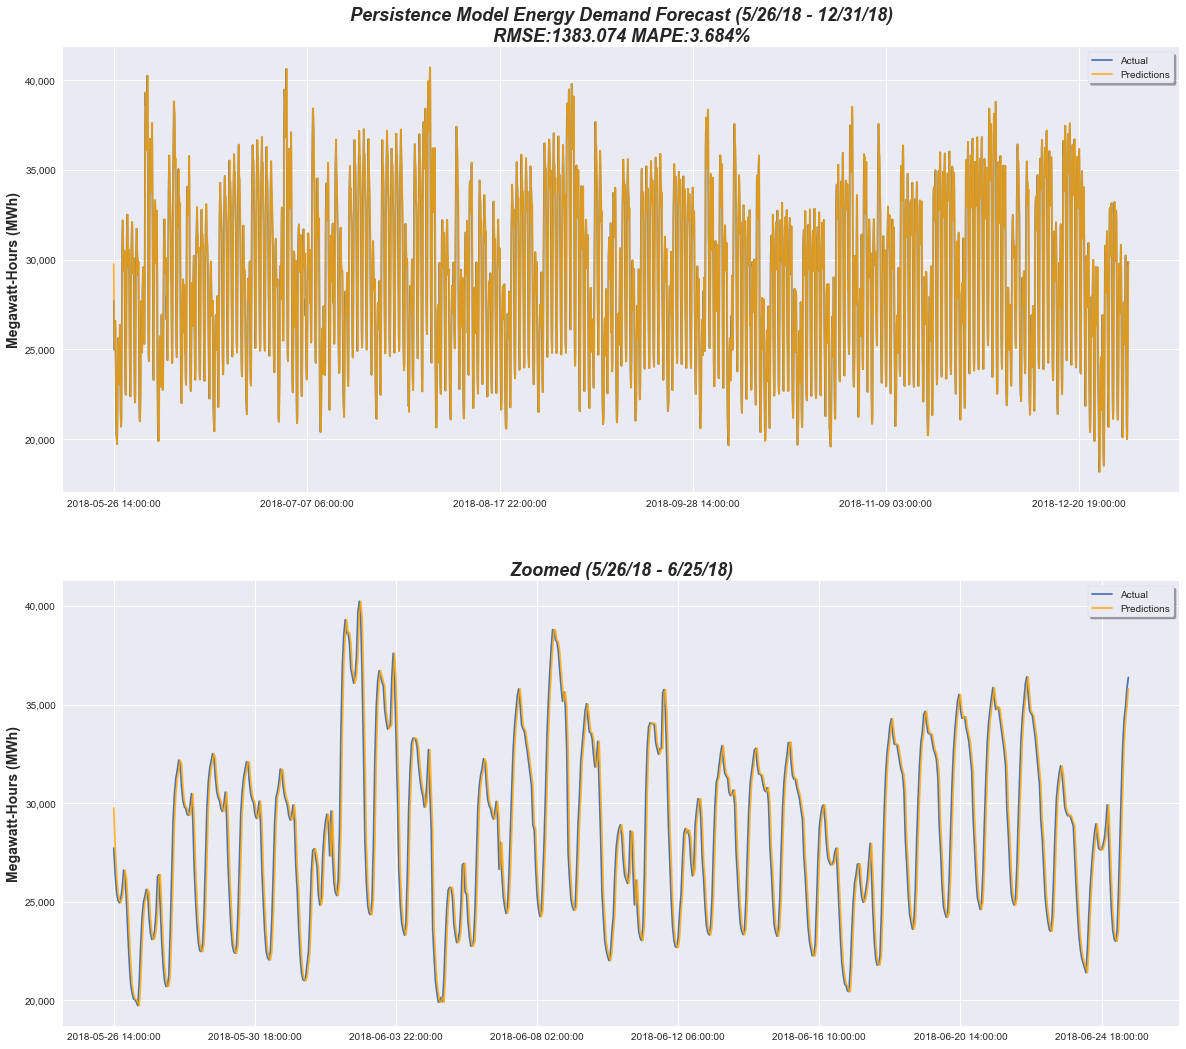

In [32]:
#Read in XGBR_Cost_Predictions model
Image(filename= model_viz + '/Base_Model_Demand_Predictions.png', height=700, width=1400)

Deep Learning LSTM Model

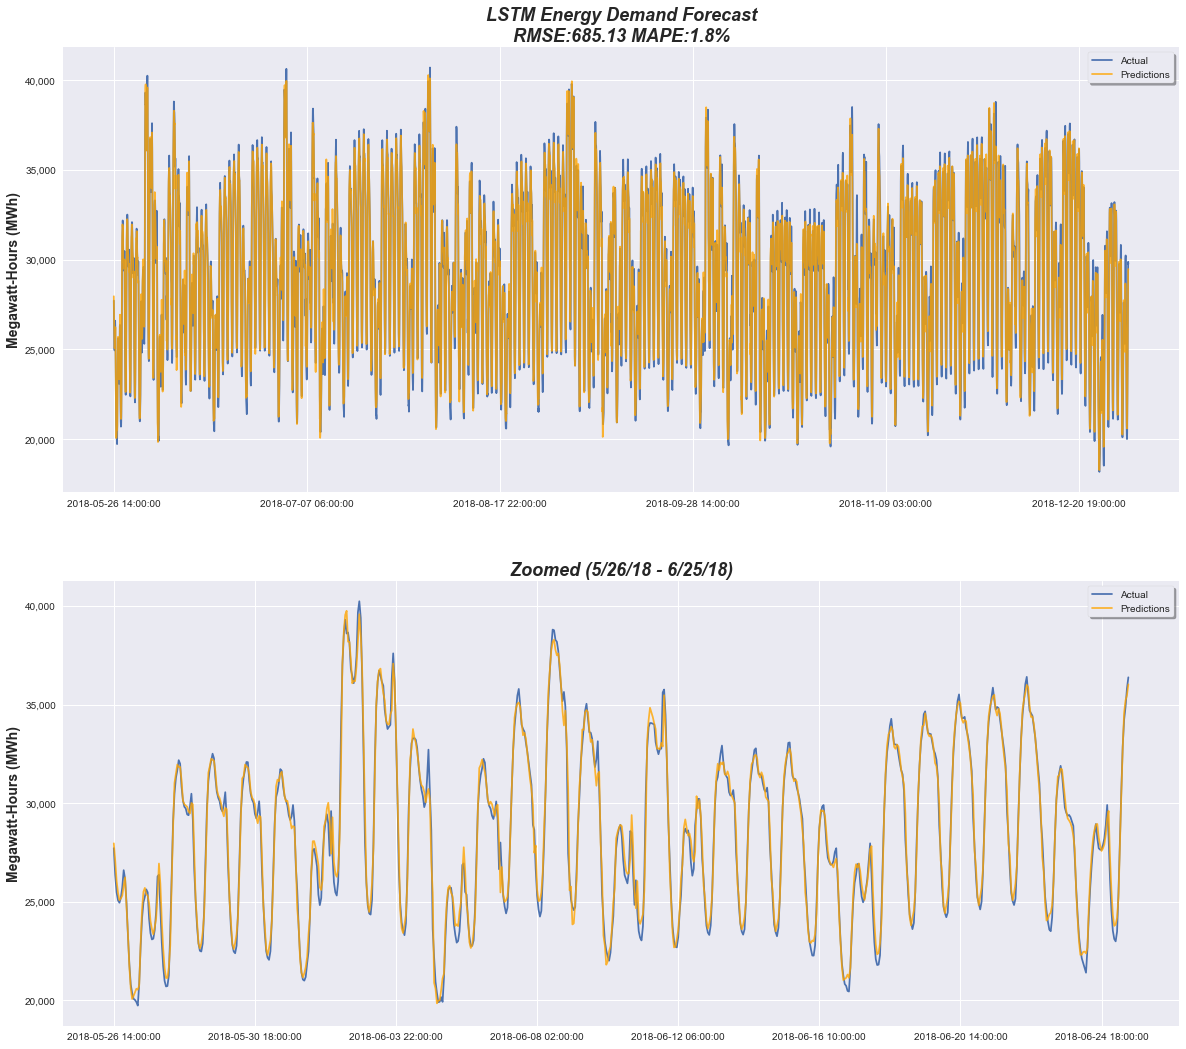

In [33]:
#Read in XGBR_Cost_Predictions model
Image(filename= model_viz + '/LSTM_Demand_Predictions.png', height=700, width=1400)

## Results

# Conclusion

## Final Takeaways

## Thoughts for future research